                                   # Weather Case study

#Exploratoty analysis on weather of Hungary to find out the factors that have impact on the temperature


In [ ]:

#Created on Monday June 14,2021

#Author: Arkaprava.Kumar



In [3]:
# =============================================================================
#  Multiple Linear Regression
# =============================================================================

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns


In [8]:
# =============================================================================
# # Importing the dataset
# =============================================================================

os.chdir('C:/Users/ARKA/Desktop/IVY _Python class notes/Linear regression/02LINEAR_REGRESSION/Resources/02LINEAR_REGRESSION/Case_2')
path_data = os.getcwd()
weather_data = pd.read_csv('WeatherHistory.csv')
weather_data.head(50)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [15]:
# =============================================================================
# # Exploratory Data Analysis
# =============================================================================
All=weather_data.describe(include='all')# describes allnumerical and  categorical data
print(All)

                       Formatted Date        Summary Precip Type  \
count                           96453          96453       95936   
unique                          96429             27           2   
top     2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
freq                                2          31733       85224   
mean                              NaN            NaN         NaN   
std                               NaN            NaN         NaN   
min                               NaN            NaN         NaN   
25%                               NaN            NaN         NaN   
50%                               NaN            NaN         NaN   
75%                               NaN            NaN         NaN   
max                               NaN            NaN         NaN   

        Temperature (C)  Apparent Temperature (C)      Humidity  \
count      96453.000000              96453.000000  96453.000000   
unique              NaN                       NaN

In [17]:
Cat=weather_data.describe(include=['O'])
print(Cat)

                       Formatted Date        Summary Precip Type  \
count                           96453          96453       95936   
unique                          96429             27           2   
top     2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
freq                                2          31733       85224   

                            Daily Summary  
count                               96453  
unique                                214  
top     Mostly cloudy throughout the day.  
freq                                20085  


In [18]:
Cor=weather_data.corr()
print(Cor)

                          Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Wind Speed (km/h)                0.008957                 -0.056650 -0.224951   
Wind Bearing (degrees)           0.029988                  0.029031  0.000735   
Visibility (km)                  0.392847                  0.381718 -0.369173   
Loud Cover                            NaN                       NaN       NaN   
Pressure (millibars)            -0.005447                 -0.000219  0.005454   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951              

In [19]:
data_set=weather_data.iloc[:,[0,2,3,4,5,8]]
print(data_set)

                      Formatted Date Precip Type  Temperature (C)  \
0      2006-04-01 00:00:00.000 +0200        rain         9.472222   
1      2006-04-01 01:00:00.000 +0200        rain         9.355556   
2      2006-04-01 02:00:00.000 +0200        rain         9.377778   
3      2006-04-01 03:00:00.000 +0200        rain         8.288889   
4      2006-04-01 04:00:00.000 +0200        rain         8.755556   
...                              ...         ...              ...   
96448  2016-09-09 19:00:00.000 +0200        rain        26.016667   
96449  2016-09-09 20:00:00.000 +0200        rain        24.583333   
96450  2016-09-09 21:00:00.000 +0200        rain        22.038889   
96451  2016-09-09 22:00:00.000 +0200        rain        21.522222   
96452  2016-09-09 23:00:00.000 +0200        rain        20.438889   

       Apparent Temperature (C)  Humidity  Visibility (km)  
0                      7.388889      0.89          15.8263  
1                      7.227778      0.86        

In [20]:
Cor_s=data_set.corr()
print(Cor_s)

                          Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Visibility (km)                  0.392847                  0.381718 -0.369173   

                          Visibility (km)  
Temperature (C)                  0.392847  
Apparent Temperature (C)         0.381718  
Humidity                        -0.369173  
Visibility (km)                  1.000000  


<AxesSubplot:xlabel='Temperature (C)', ylabel='Humidity'>

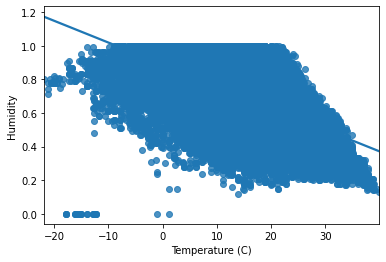

In [21]:
# plotting a scatter plot between temp and humdity
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"])

In [22]:
# Outlier Indetification and Removal based on Z-Score

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_data = detect_outlier(data_set["Humidity"])
print (outlier_data)


[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [24]:
#Removing the Outliers
data_set_clean = data_set[data_set["Humidity"]>0.15]
print(data_set_clean)

                      Formatted Date Precip Type  Temperature (C)  \
0      2006-04-01 00:00:00.000 +0200        rain         9.472222   
1      2006-04-01 01:00:00.000 +0200        rain         9.355556   
2      2006-04-01 02:00:00.000 +0200        rain         9.377778   
3      2006-04-01 03:00:00.000 +0200        rain         8.288889   
4      2006-04-01 04:00:00.000 +0200        rain         8.755556   
...                              ...         ...              ...   
96448  2016-09-09 19:00:00.000 +0200        rain        26.016667   
96449  2016-09-09 20:00:00.000 +0200        rain        24.583333   
96450  2016-09-09 21:00:00.000 +0200        rain        22.038889   
96451  2016-09-09 22:00:00.000 +0200        rain        21.522222   
96452  2016-09-09 23:00:00.000 +0200        rain        20.438889   

       Apparent Temperature (C)  Humidity  Visibility (km)  
0                      7.388889      0.89          15.8263  
1                      7.227778      0.86        

<AxesSubplot:xlabel='Temperature (C)', ylabel='Humidity'>

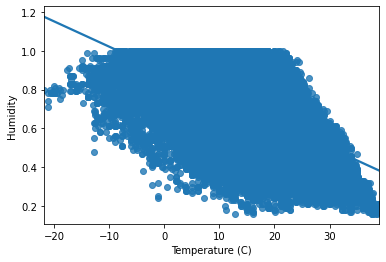

In [25]:
#plotting a scatter plot between temp and humdity after removing the outliers

sns.regplot(x=data_set_clean["Temperature (C)"], y=data_set_clean["Humidity"])

In [27]:
# =============================================================================
# Creating the Independendent and Dependent Data Sets
# =============================================================================

y= data_set_clean.iloc[:,[2]] # Dependent Data
print(y)

       Temperature (C)
0             9.472222
1             9.355556
2             9.377778
3             8.288889
4             8.755556
...                ...
96448        26.016667
96449        24.583333
96450        22.038889
96451        21.522222
96452        20.438889

[96415 rows x 1 columns]


In [28]:
X= data_set_clean.iloc[:,[1,3,4]]
print(X)

      Precip Type  Apparent Temperature (C)  Humidity
0            rain                  7.388889      0.89
1            rain                  7.227778      0.86
2            rain                  9.377778      0.89
3            rain                  5.944444      0.83
4            rain                  6.977778      0.83
...           ...                       ...       ...
96448        rain                 26.016667      0.43
96449        rain                 24.583333      0.48
96450        rain                 22.038889      0.56
96451        rain                 21.522222      0.60
96452        rain                 20.438889      0.61

[96415 rows x 3 columns]


In [29]:
Z = X['Precip Type'].unique()
print(Z)

['rain' 'snow' nan]


In [33]:
X_data=pd.DataFrame(X)

X1_data = X_data.drop(['Apparent Temperature (C)'],axis =1)
print(X1_data.head())

  Precip Type  Humidity
0        rain      0.89
1        rain      0.86
2        rain      0.89
3        rain      0.83
4        rain      0.83


In [37]:
#One-Hot Encoding categorical data with X1_data 
X2_data= pd.get_dummies(X1_data, columns =['Precip Type'])
print(X2_data.head(50))


    Humidity  Precip Type_rain  Precip Type_snow
0       0.89                 1                 0
1       0.86                 1                 0
2       0.89                 1                 0
3       0.83                 1                 0
4       0.83                 1                 0
5       0.85                 1                 0
6       0.95                 1                 0
7       0.89                 1                 0
8       0.82                 1                 0
9       0.72                 1                 0
10      0.67                 1                 0
11      0.54                 1                 0
12      0.55                 1                 0
13      0.51                 1                 0
14      0.47                 1                 0
15      0.46                 1                 0
16      0.60                 1                 0
17      0.63                 1                 0
18      0.69                 1                 0
19      0.70        

In [39]:
# =============================================================================
# # Splitting the dataset into the Training set and Test set
# =============================================================================
from sklearn.model_selection import train_test_split
X2_data_train, X2_data_test, y_train, y_test = train_test_split(X2_data, y, test_size = 0.2, random_state = 0)
print(X2_data_train, X2_data_test, y_train, y_test)

       Humidity  Precip Type_rain  Precip Type_snow
11644      0.79                 1                 0
27595      0.29                 1                 0
31605      0.86                 1                 0
77952      0.80                 1                 0
15245      0.84                 1                 0
...         ...               ...               ...
21255      0.35                 1                 0
45907      0.85                 1                 0
42629      0.93                 1                 0
43583      0.96                 1                 0
68304      0.94                 1                 0

[77132 rows x 3 columns]        Humidity  Precip Type_rain  Precip Type_snow
66168      0.93                 1                 0
28288      0.76                 1                 0
8609       0.47                 1                 0
13313      0.40                 1                 0
70048      0.32                 1                 0
...         ...               ...     

In [40]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_data_train, y_train)

LinearRegression()

In [41]:
# Predicting the Test set results
y_pred = regressor.predict(X2_data_test)
y_pred_data=pd.DataFrame(y_pred)

Score_train=regressor.score(X2_data_train,y_train)
print(Score_train)
Score_test=regressor.score(X2_data_test,y_test)
print(Score_test)


0.5855549212037168
0.5833586679583312


In [43]:
# =============================================================================
# #Model Statistics
# =============================================================================
#Adding Intercept term to the model
X2_data_train=sm.add_constant(X2_data_train)
print(X2_data_train)
X2_data_test=sm.add_constant(X2_data_test)
print(X2_data_test)

       const  Humidity  Precip Type_rain  Precip Type_snow
11644    1.0      0.79                 1                 0
27595    1.0      0.29                 1                 0
31605    1.0      0.86                 1                 0
77952    1.0      0.80                 1                 0
15245    1.0      0.84                 1                 0
...      ...       ...               ...               ...
21255    1.0      0.35                 1                 0
45907    1.0      0.85                 1                 0
42629    1.0      0.93                 1                 0
43583    1.0      0.96                 1                 0
68304    1.0      0.94                 1                 0

[77132 rows x 4 columns]
       const  Humidity  Precip Type_rain  Precip Type_snow
66168    1.0      0.93                 1                 0
28288    1.0      0.76                 1                 0
8609     1.0      0.47                 1                 0
13313    1.0      0.40        

In [44]:
#Printing the Model Statistics
model = sm.OLS(y_pred,X2_data_test).fit()
Summary_Stats = model.summary()
print(Summary_Stats)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.997e+32
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:29:18   Log-Likelihood:             5.7072e+05
No. Observations:               19283   AIC:                        -1.141e+06
Df Residuals:                   19279   BIC:                        -1.141e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.8501   3.43e-15  

In [46]:
#Converting into Dataframe
X_train_d=pd.DataFrame(X2_data_train)
print(X_train_d)

       const  Humidity  Precip Type_rain  Precip Type_snow
11644    1.0      0.79                 1                 0
27595    1.0      0.29                 1                 0
31605    1.0      0.86                 1                 0
77952    1.0      0.80                 1                 0
15245    1.0      0.84                 1                 0
...      ...       ...               ...               ...
21255    1.0      0.35                 1                 0
45907    1.0      0.85                 1                 0
42629    1.0      0.93                 1                 0
43583    1.0      0.96                 1                 0
68304    1.0      0.94                 1                 0

[77132 rows x 4 columns]


In [47]:
#Checking the VIF Value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)


,VIF Factor,features
0,203.0,const
1,1.1,Humidity
2,19.4,Precip Type_rain
3,19.4,Precip Type_snow


In [49]:
X3_data_train = X2_data_train.drop(['const'],axis =1)
print(X3_data_train.head())
X3_data_test = X2_data_test.drop(['const'],axis =1)
print(X3_data_test.head())

       Humidity  Precip Type_rain  Precip Type_snow
11644      0.79                 1                 0
27595      0.29                 1                 0
31605      0.86                 1                 0
77952      0.80                 1                 0
15245      0.84                 1                 0
       Humidity  Precip Type_rain  Precip Type_snow
66168      0.93                 1                 0
28288      0.76                 1                 0
8609       0.47                 1                 0
13313      0.40                 1                 0
70048      0.32                 1                 0


In [50]:
#Printing the Model Statistics after dropping 'const' variable
model = sm.OLS(y_pred,X3_data_test).fit()
Summary_Stats = model.summary()
print(Summary_Stats)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          2.730e+05
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                        0.00
Time:                        17:54:31   Log-Likelihood:                         -41862.
No. Observations:               19283   AIC:                                  8.373e+04
Df Residuals:                   19280   BIC:                                  8.375e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [52]:
#Converting into Dataframe
X1_train_d=pd.DataFrame(X3_data_train)

In [53]:
#Checking the VIF Value after dropping the variable constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X1_train_d.values, j) for j in range(X1_train_d.shape[1])]
vif["features"] = X1_train_d.columns
vif.round(1)

,VIF Factor,features
0,14.9,Humidity
1,12.7,Precip Type_rain
2,3.1,Precip Type_snow


In [56]:
X4_data_train = X3_data_train.drop(['Precip Type_rain'],axis =1)
print(X3_data_train.head())
X4_data_test = X3_data_test.drop(['Precip Type_rain'],axis =1)
print(X4_data_test.head())

       Humidity  Precip Type_rain  Precip Type_snow
11644      0.79                 1                 0
27595      0.29                 1                 0
31605      0.86                 1                 0
77952      0.80                 1                 0
15245      0.84                 1                 0
       Humidity  Precip Type_snow
66168      0.93                 0
28288      0.76                 0
8609       0.47                 0
13313      0.40                 0
70048      0.32                 0


In [57]:
#Printing the Model Statistics after dropping 'Precip Type_rain' variable
model = sm.OLS(y_pred,X4_data_test).fit()
Summary_Stats = model.summary()
print(Summary_Stats)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.650
Method:                 Least Squares   F-statistic:                          1.793e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                        0.00
Time:                        18:06:06   Log-Likelihood:                         -68103.
No. Observations:               19283   AIC:                                  1.362e+05
Df Residuals:                   19281   BIC:                                  1.362e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [58]:
#Converting into Dataframe
X2_train_d=pd.DataFrame(X4_data_train)

#Checking the VIF Value after dropping the variable 'Precip Type_rain'

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X2_train_d.values, j) for j in range(X2_train_d.shape[1])]
vif["features"] = X2_train_d.columns
vif.round(1)

,VIF Factor,features
0,1.2,Humidity
1,1.2,Precip Type_snow
